In [13]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [14]:
N = 1000

# Erstelle zufällig eingabe
x =torch.rand(N, 2)




In [15]:
print(x.shape)

torch.Size([1000, 2])


In [16]:
x

tensor([[0.2207, 0.7494],
        [0.1166, 0.1842],
        [0.7240, 0.8193],
        ...,
        [0.6041, 0.2744],
        [0.1056, 0.9536],
        [0.0074, 0.3610]])

In [17]:
# Definiere Funktion f, welche aus Eingabewerten eine eindimensionale Ausgabe erzeugt.
def f(x):
    val = x[:,0]  + x[:,1]
    return val

In [18]:
y = f(x)
#y = torch.rand(N, 1)


In [19]:
y

tensor([0.9701, 0.3007, 1.5432, 1.2431, 1.5282, 0.9266, 0.9519, 1.8202, 0.6235,
        0.5269, 0.5053, 0.5554, 1.5562, 1.0029, 1.1098, 0.6212, 0.8059, 0.7561,
        0.4047, 0.7867, 0.7194, 0.9871, 0.9375, 1.2604, 1.0345, 1.4893, 0.5030,
        0.9934, 1.5852, 1.6022, 1.2336, 0.4090, 1.0767, 0.4945, 1.7317, 0.3780,
        1.0272, 1.6315, 1.3969, 0.8991, 1.0039, 0.3224, 0.2275, 0.4787, 0.8156,
        1.4648, 1.2729, 1.7678, 0.6914, 1.4849, 0.9540, 1.4047, 1.7059, 0.4107,
        0.9956, 1.7711, 1.7750, 0.8610, 1.5090, 1.3945, 0.6109, 1.0417, 1.2813,
        0.8914, 1.6557, 0.4576, 0.5032, 0.6952, 0.8045, 1.2127, 0.2253, 0.7725,
        0.6093, 1.0995, 1.6493, 1.4051, 1.0502, 0.9862, 1.3142, 0.7661, 1.4212,
        0.8723, 1.9115, 0.4560, 1.0311, 0.9277, 1.1379, 1.4757, 0.5293, 1.3971,
        1.1037, 1.0364, 0.4939, 1.2995, 0.5729, 1.1447, 0.7699, 0.8689, 1.6305,
        1.2503, 1.2705, 0.7851, 0.2037, 1.1622, 1.3994, 0.5281, 0.1295, 0.4082,
        1.3922, 1.6447, 1.0606, 1.7414, 

/var/folders/7w/cqwwv7rx4ld69zv2g0wnxx_80000gn/T/ipykernel_21278/1428470703.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


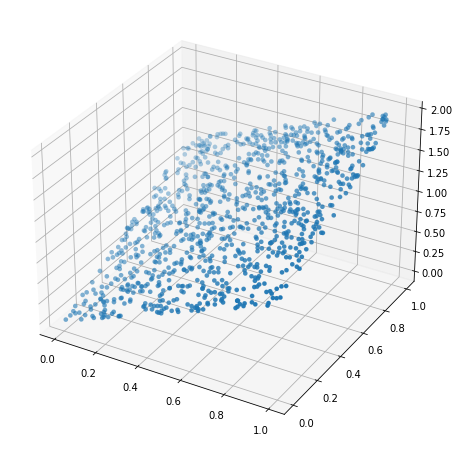

In [20]:
fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.gca(projection='3d')

ax.scatter(x[:,0].tolist(), x[:,1].tolist(),y.tolist(), linewidth=0.1, antialiased=True)

plt.show()

## https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html

In [28]:
model = torch.nn.Sequential(
          torch.nn.Linear(x.shape[1], 5),
          torch.nn.Tanh(),
          torch.nn.Linear(5, 1), 
        )

loss_fn = torch.nn.MSELoss(reduction='sum')

# Training

### https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html


In [29]:
training = []

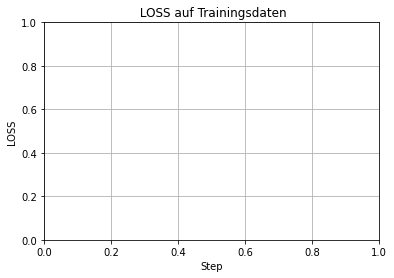

/var/folders/7w/cqwwv7rx4ld69zv2g0wnxx_80000gn/T/ipykernel_21278/4136956159.py:40: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


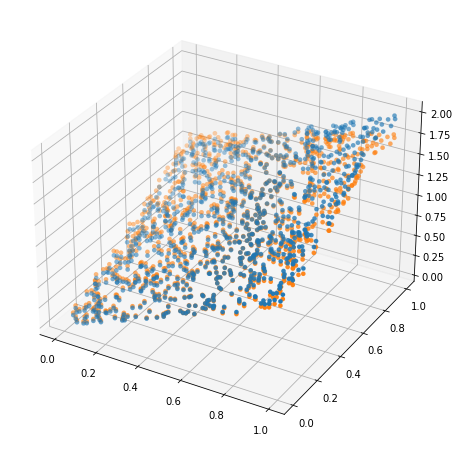

In [33]:
learning_rate = 1e-4


for t in range(50):
      
    
    y_pred = model(x)

  
    loss = loss_fn(torch.reshape(y_pred, (-1,)), y)
    
    training.append([loss, model.named_parameters()])
  
# Autograd

    model.zero_grad()

    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            #Gradientenabstieg
            param.data -= learning_rate * param.grad

loss = [step[0] for step in training]
fig, ax = plt.subplots()

#ax.plot(loss)

ax.set(ylabel='LOSS', xlabel='Step',
       title=' LOSS auf Trainingsdaten')
ax.grid()

#fig.savefig("test.png")
plt.show()


fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.gca(projection='3d')

ax.scatter(x[:,0].tolist(), x[:,1].tolist(),y.tolist(), linewidth=0.1, antialiased=True)
ax.scatter(x[:,0].tolist(), x[:,1].tolist(),torch.reshape(y_pred, (-1,)).tolist(), linewidth=0.1, antialiased=True)

plt.show()


In [ ]:
for step in training:
    print('-----------------------------------------')
    for name, param in step[1]:
            print(param.data) 
            print(name, param)

In [31]:
y -torch.reshape(y_pred, (-1,))

tensor([-9.6591e-02, -2.5355e-01,  1.9911e-01, -3.9616e-03,  2.0458e-01,
        -6.6642e-02, -1.4627e-01,  3.6104e-01, -9.1167e-02, -1.6201e-01,
        -1.4900e-01, -1.7529e-01,  2.4524e-01,  4.5484e-02,  8.0530e-02,
        -1.5926e-01, -6.3872e-02, -1.2164e-01, -2.0735e-01, -4.4643e-02,
        -7.2476e-02, -9.2179e-02, -4.2098e-02,  3.1141e-02, -1.0709e-01,
         1.4367e-01, -1.5559e-01, -8.4421e-02,  2.3319e-01,  2.1256e-01,
         2.3313e-02, -1.7846e-01,  1.2717e-03, -2.4697e-01,  2.9421e-01,
        -2.2128e-01,  2.4812e-03,  2.3523e-01,  1.0712e-01, -8.8403e-02,
         3.6781e-02, -2.2066e-01, -2.5984e-01, -1.4779e-01, -1.2272e-01,
         1.8842e-01,  2.2272e-02,  3.4262e-01, -1.8939e-01,  2.2062e-01,
         6.2022e-02,  1.1493e-01,  2.6538e-01, -2.5621e-01, -1.0490e-01,
         3.4551e-01,  3.4820e-01,  1.4384e-02,  1.6539e-01,  1.6032e-01,
        -1.1465e-01,  6.4121e-02,  2.9777e-02, -9.0394e-02,  2.8885e-01,
        -2.4653e-01, -1.7685e-01, -1.8501e-01, -8.8

# Test

/var/folders/7w/cqwwv7rx4ld69zv2g0wnxx_80000gn/T/ipykernel_21278/449950079.py:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


25.656444549560547


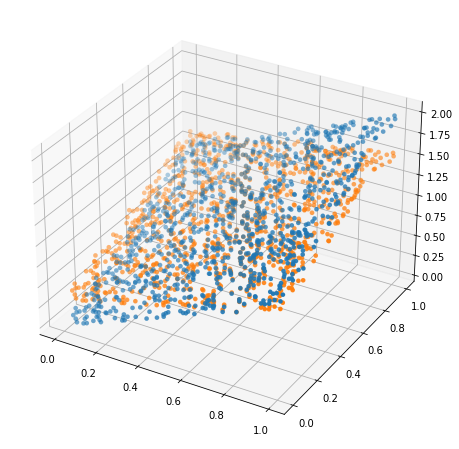

In [32]:
N = 1000

# Erstelle zufällig eingabe
x =torch.rand(N, 2)

y = f(x)

y_pred = model(x)


loss = loss_fn(torch.reshape(y_pred, (-1,)), y)

fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.gca(projection='3d')

ax.scatter(x[:,0].tolist(), x[:,1].tolist(),y.tolist(), linewidth=0.1, antialiased=True)
ax.scatter(x[:,0].tolist(), x[:,1].tolist(),torch.reshape(y_pred, (-1,)).tolist(), linewidth=0.1, antialiased=True)
print(loss.item())
plt.show()